# Data Professional Salary

In [335]:
import pandas as pd
import numpy as np

## Lendo Arquivo

In [336]:
salary_data_frame = pd.read_csv('data_professional_salary_survery.csv')
salary_data_frame

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,NewestVersionInProduction,OldestVersionInProduction,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2020,1/4/2020 18:50:34,115.000,United States,03,Microsoft SQL Server,15,"Microsoft SQL Server, MongoDB, Azure SQL DB (a...",Full time employee,DBA (Production Focus - build & troubleshoot s...,...,SQL Server 2019,SQL Server 2016,20K-99K (large town),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
1,2020,1/4/2020 10:43:02,100.000,United States,NaN,Other,6,MySQL/MariaDB,Full time employee,"Developer: App code (C#, JS, etc)",...,informix,informix,1M+ (metropolis),Private business,Not Asked,Prefer not to say,Male,Not Asked,Not Asked,1
2,2020,1/4/2020 9:51:46,100.000,Spain,28046,Microsoft SQL Server,2,MySQL/MariaDB,Full time employee,Other,...,SQL Server 2017,SQL Server 2017,1M+ (metropolis),Private business,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
3,2020,1/4/2020 1:08:54,70.000,United States,94133,Microsoft SQL Server,3,Microsoft Access,Full time employee,Analyst,...,SQL Server 2016,SQL Server 2012,1M+ (metropolis),Private business,Not Asked,Change both employers and roles,Male,Not Asked,Not Asked,1
4,2020,1/3/2020 15:28:54,110.000,United States,95354,Oracle,30,"Microsoft SQL Server, Oracle, MySQL/MariaDB, P...",Full time employee,DBA (General - splits time evenly between writ...,...,SQL Server 2016,SQL Server 2008R2,100K-299K (city),Non-profit,Not Asked,"Stay with the same employer, same role",Male,Not Asked,Not Asked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,2017,1/5/2017 5:34:34,35.000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,Not Asked,Not Asked,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
8623,2017,1/5/2017 5:33:03,56.000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,Not Asked,Not Asked,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
8624,2017,1/5/2017 5:32:57,95.000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,Not Asked,Not Asked,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
8625,2017,1/5/2017 5:26:23,61.515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,Not Asked,Not Asked,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1


## Análise Exploratória

In [337]:
salary_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627 entries, 0 to 8626
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Survey Year                           8627 non-null   int64 
 1   Timestamp                             8627 non-null   object
 2   SalaryUSD                             8627 non-null   object
 3   Country                               8627 non-null   object
 4   PostalCode                            7237 non-null   object
 5   PrimaryDatabase                       8627 non-null   object
 6   YearsWithThisDatabase                 8627 non-null   int64 
 7   OtherDatabases                        6979 non-null   object
 8   EmploymentStatus                      8627 non-null   object
 9   JobTitle                              8627 non-null   object
 10  ManageStaff                           8627 non-null   object
 11  YearsWithThisTypeOfJob        

In [338]:
salary_data_frame.isnull().sum()

Survey Year                                0
Timestamp                                  0
SalaryUSD                                  0
Country                                    0
PostalCode                              1390
PrimaryDatabase                            0
YearsWithThisDatabase                      0
OtherDatabases                          1648
EmploymentStatus                           0
JobTitle                                   0
ManageStaff                                0
YearsWithThisTypeOfJob                     0
HowManyCompanies                           0
OtherPeopleOnYourTeam                      0
CompanyEmployeesOverall                    0
DatabaseServers                            0
Education                                  0
EducationIsComputerRelated              1216
Certifications                             0
HoursWorkedPerWeek                         0
TelecommuteDaysPerWeek                     0
NewestVersionInProduction                 10
OldestVers

<BarContainer object of 3 artists>

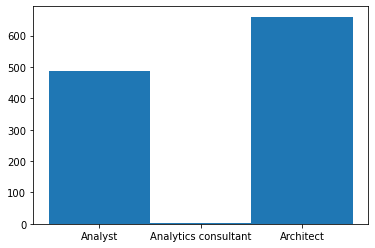

In [339]:
import matplotlib.pyplot as plt
x, y = np.unique(salary_data_frame['JobTitle'], return_counts=True)
x = x[:3]
y = y[:3]
plt.bar(x, y, width=1)

In [340]:
np.unique(salary_data_frame['Education'], return_counts=True)

(array(['Associates (2 years)', 'Bachelors (4 years)', 'Doctorate/PhD',
        'Masters', 'None (no degree completed)', 'Not Asked'], dtype=object),
 array([ 764, 3658,   51, 1236, 1184, 1734]))

In [341]:
np.unique(salary_data_frame['PrimaryDatabase'], return_counts=True)

(array(['Amazon RDS (any flavor)', 'Azure SQL DB', 'Cassandra', 'DB2',
        'Elasticsearch', 'Microsoft Access', 'Microsoft SQL Server',
        'MongoDB', 'MySQL/MariaDB', 'Oracle', 'Other', 'PostgreSQL', 'SAP',
        'SQLite', 'Teradata'], dtype=object),
 array([  22,   40,    4,   22,    2,   17, 8006,    8,   49,  286,   74,
          70,   11,    5,   11]))

### Tratamento de valores inconsistentes

In [342]:
# Convertendo Coluna SalaryUSD do tipo str para o tipo float
salary_data_frame['SalaryUSD'] = salary_data_frame['SalaryUSD'].apply(lambda s : s.replace('.', ''))
salary_data_frame['SalaryUSD'] = salary_data_frame['SalaryUSD'].apply(lambda s : s.replace(',', ''))
salary_data_frame = salary_data_frame[salary_data_frame['SalaryUSD'] != '-']
salary_data_frame = salary_data_frame.astype({'SalaryUSD': float})

### Tratamento de Valores Faltantes

In [343]:
# Removendo colunas não necessárias ao modelo
salary_data_frame = salary_data_frame.drop('PostalCode', axis=1)
salary_data_frame = salary_data_frame.drop('Timestamp', axis=1)
salary_data_frame = salary_data_frame.drop('EmploymentStatus', axis=1)
salary_data_frame = salary_data_frame.drop('JobTitle', axis=1)
salary_data_frame = salary_data_frame.drop('YearsWithThisTypeOfJob', axis=1)
salary_data_frame = salary_data_frame.drop('OtherDatabases', axis=1)
salary_data_frame = salary_data_frame.drop('HowManyCompanies', axis=1)
salary_data_frame = salary_data_frame.drop('Gender', axis=1)
salary_data_frame = salary_data_frame.drop('OtherPeopleOnYourTeam', axis=1)
salary_data_frame = salary_data_frame.drop('DatabaseServers', axis=1)
salary_data_frame = salary_data_frame.drop('EducationIsComputerRelated', axis=1)
salary_data_frame = salary_data_frame.drop('Certifications', axis=1)
salary_data_frame = salary_data_frame.drop('TelecommuteDaysPerWeek', axis=1)
salary_data_frame = salary_data_frame.drop('NewestVersionInProduction', axis=1)
salary_data_frame = salary_data_frame.drop('OldestVersionInProduction', axis=1)
salary_data_frame = salary_data_frame.drop('PopulationOfLargestCityWithin20Miles', axis=1)
salary_data_frame = salary_data_frame.drop('EmploymentSector', axis=1)
salary_data_frame = salary_data_frame.drop('LookingForAnotherJob', axis=1)
salary_data_frame = salary_data_frame.drop('CareerPlansThisYear', axis=1)
salary_data_frame = salary_data_frame.drop('ManageStaff', axis=1)
salary_data_frame = salary_data_frame.drop('CompanyEmployeesOverall', axis=1)
salary_data_frame = salary_data_frame.drop('OtherJobDuties', axis=1)
salary_data_frame = salary_data_frame.drop('KindsOfTasksPerformed', axis=1)
salary_data_frame = salary_data_frame.drop('Counter', axis=1)

In [344]:
salary_data_frame = salary_data_frame[salary_data_frame['HoursWorkedPerWeek'] != 'Not Asked']
salary_data_frame = salary_data_frame.astype({'HoursWorkedPerWeek': int})

In [345]:
salary_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6891 entries, 1734 to 8626
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey Year            6891 non-null   int64  
 1   SalaryUSD              6891 non-null   float64
 2   Country                6891 non-null   object 
 3   PrimaryDatabase        6891 non-null   object 
 4   YearsWithThisDatabase  6891 non-null   int64  
 5   Education              6891 non-null   object 
 6   HoursWorkedPerWeek     6891 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 430.7+ KB


### Divisão Entre Previsores e Classes

In [346]:
# Reordenando colunas
salary_data_frame = salary_data_frame[['Survey Year', 'Country', 'PrimaryDatabase', 'YearsWithThisDatabase', 'Education', 'HoursWorkedPerWeek', 'SalaryUSD']]
salary_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6891 entries, 1734 to 8626
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey Year            6891 non-null   int64  
 1   Country                6891 non-null   object 
 2   PrimaryDatabase        6891 non-null   object 
 3   YearsWithThisDatabase  6891 non-null   int64  
 4   Education              6891 non-null   object 
 5   HoursWorkedPerWeek     6891 non-null   int64  
 6   SalaryUSD              6891 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 430.7+ KB


In [347]:
x_salary = salary_data_frame.iloc[:, 0:6].values

In [348]:
y_salary = salary_data_frame.iloc[:, 6].values

In [349]:
x_salary.shape, y_salary.shape

((6891, 6), (6891,))

### Tratamento de atributos categóricos

In [350]:
from sklearn.preprocessing import LabelEncoder

In [351]:
label_encoder = LabelEncoder()
x_salary[:,1] = label_encoder.fit_transform(x_salary[:,1])
x_salary[:,2] = label_encoder.fit_transform(x_salary[:,2])

In [352]:
x_salary[0]

array([2019, 11, 6, 19, 'Bachelors (4 years)', 40], dtype=object)

In [353]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [354]:
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [4])], remainder='passthrough')

In [355]:
x_salary = onehotencoder.fit_transform(x_salary)

In [356]:
x_salary[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 2019, 11, 6, 19, 40], dtype=object)

In [357]:
x_salary.shape

(6891, 10)

### Escalonamento dos Valores

In [358]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_salary = scaler.fit_transform(x_salary)

In [359]:
x_salary[0]

array([-0.35312034,  0.94011504, -0.08634895, -0.46751218, -0.45501815,
        1.90036712, -2.51034045, -0.15258589, -0.005576  , -0.44997164])

### Divisão das bases em treinamento e teste

In [360]:
from sklearn.model_selection import train_test_split
X_salary_training, x_salary_testing, y_salary_training, y_salary_testing = train_test_split(x_salary, y_salary, test_size = 0.2, random_state = 0)

In [361]:
X_salary_training.shape, y_salary_training.shape

((5512, 10), (5512,))

In [362]:
x_salary_testing.shape, y_salary_testing.shape

((1379, 10), (1379,))

### Aplicando Regressão Linear

In [363]:
salary_data_frame.corr()

,Survey Year,YearsWithThisDatabase,HoursWorkedPerWeek,SalaryUSD
Survey Year,1.000000,0.007105,-0.009317,0.031921
YearsWithThisDatabase,0.007105,1.000000,0.009188,0.003088
HoursWorkedPerWeek,-0.009317,0.009188,1.000000,0.161495
SalaryUSD,0.031921,0.003088,0.161495,1.000000


In [364]:
from sklearn.linear_model import LinearRegression

In [365]:
regressor = LinearRegression()
regressor.fit(X_salary_training, y_salary_training)

LinearRegression()

In [366]:
regressor.intercept_, regressor.coef_

(92713.48711901307,
 array([-3.74000949e+17, -5.94465681e+17, -1.02097527e+17, -4.57012022e+17,
        -4.49046013e+17,  1.83415048e+03,  1.09429526e+04, -4.09419260e+02,
        -2.39841990e+01,  7.70031851e+03]))

In [367]:
regressor.score(X_salary_training, y_salary_training)

0.0596490164937552

In [368]:
regressor.score(x_salary_testing, y_salary_testing)

0.08328164014271777

In [369]:
regressor.predict([x_salary_testing[1000]]), y_salary_testing[1000]

(array([89833.48711901]), 105000.0)

### Métricas de Avaliação da Regressão

In [370]:
from sklearn import metrics

In [371]:
predictions = regressor.predict(x_salary_testing)

In [372]:
metrics.mean_absolute_error(y_salary_testing, predictions)

29405.032070182955

In [373]:
metrics.mean_squared_error(y_salary_testing, predictions)

2496187859.2288933

In [374]:
np.sqrt(metrics.mean_squared_error(y_salary_testing, predictions))

49961.86404878118